OBJECTIVE:
Pilih satu dari tiga problem statement di bawah ini:
IMDb Movie Award membuat segmen acara khusus untuk memberi penghargaan perfilman pada tahun 1990-1999. Tim produksi membutuhkan daftar 5 nominasi dan 1 pemenang untuk masing-masing kategori penghargaan utama, yaitu Aktor Terbaik Tahun 90an dan Aktris Terbaik Tahun 90an.
IMDb Movie Award pada puncak acaranya membuat segmen spesial berupa penghargaan dengan kategori Aktor Legenda Abad Ini. Nominasi dan pemenang penghargaan ini setidaknya harus memenuhi 3 kriteria berikut: telah berkarir dalam waktu yang lama, telah berakting di banyak film dengan rating yang baik. Tim produksi membutuhkan daftar 3 nominasi dan 1 pemenang untuk penghargaan pada kategori tersebut.
QarirLabs Entertainment sedang dalam proses membuat TV series dengan episode yang cukup banyak. TV Series tersebut memiliki konsep banyak plot twist pada alur ceritanya dan perubahan perkembangan karakter yang sangat drastis khususnya pada pemeran utama. Menurut sutradara, aktris dengan pengalaman berakting di beragam genre film dengan rating tinggi merupakan kandidat yang paling cocok. Tim casting membutuhkan daftar berisi 5 rekomendasi aktris yang berpotensi menjadi pemeran utama yang baik pada TV Series tersebut.
Berdasarkan problem statement yang dipilih, buatlah analisis yang meliputi langkah-langkah berikut:
Data Collection
Data Cleaning
Data Analysis
Conclusion

In [ ]:
!pip3 install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 67.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247953 sha256=ba915ced302f46d0b7d876234c577f0d9854c9c60365d9c84b8498a974dbae90
  Stored in directory: /root/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql-connector


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sqlalchemy import create_engine, text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def que(query, engine):
    df = pd.read_sql(text(query), engine)
    return df

In [ ]:
username = 'guest'
password = 'relational'
host = 'relational.fit.cvut.cz'
database = 'imdb_ijs'

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}").connect()

In [ ]:
# print first 5 rows of each tables
query='''
    show tables
'''

tables = que(query, engine)

for i in tables.Tables_in_imdb_ijs:
  query='''
      select * from ''' + i + '''
      limit 5

  '''

  print('TABLE:', i)
  print(que(query, engine))
  print()

TABLE: actors
   id first_name           last_name gender
0   2    Michael  'babeepower' Viera      M
1   3       Eloy         'Chincheta'      M
2   4   Dieguito         'El Cigala'      M
3   5    Antonio    'El de Chipiona'      M
4   6       José        'El Francés'      M

TABLE: directors
   id first_name    last_name
0   1       Todd            1
1   2        Les  12 Poissons
2   3    Lejaren     a'Hiller
3   4       Nian            A
4   5   Khairiya    A-Mansour

TABLE: directors_genres
   director_id        genre  prob
0            2        Short   1.0
1            3        Drama   1.0
2            5  Documentary   1.0
3            6        Drama   1.0
4            6        Short   1.0

TABLE: movies
   id                                 name  year  rank
0   0                                  #28  2002   NaN
1   1  #7 Train: An Immigrant Journey, The  2000   NaN
2   2                                    $  1971   6.4
3   3                        $1,000 Reward  1913   NaN
4   4

In [ ]:
query = '''
    SELECT a.id AS actor_id, a.first_name, a.last_name, a.gender,
           m.id AS movie_id, m.name AS movie_name, m.year, m.rank,
           r.role,
           mg.genre, m.name AS judul_film

    FROM actors a
    LEFT JOIN roles r ON a.id = r.actor_id
    LEFT JOIN movies m ON r.movie_id = m.id
    LEFT JOIN movies_genres mg ON m.id = mg.movie_id
    where m.year between 1990 and 1999;
'''

df = que(query, engine)
print(df)

         actor_id    first_name  last_name gender  movie_id movie_name  year  \
0          223733       Gregory      Itzin      M        15        $30  1999   
1          289908          Erik  MacArthur      M        15        $30  1999   
2          632759      Sara (I)    Gilbert      F        15        $30  1999   
3          223733       Gregory      Itzin      M        15        $30  1999   
4          289908          Erik  MacArthur      M        15        $30  1999   
...           ...           ...        ...    ...       ...        ...   ...   
1124564    613290         Alexa    Eordogh      F    412317   "rgammk"  1995   
1124565    657249         Aniko    Horvath      F    412317   "rgammk"  1995   
1124566    806565  Ildikó (III)      Szabó      F    412317   "rgammk"  1995   
1124567    806829        Andrea     Szulak      F    412317   "rgammk"  1995   
1124568    818511          Nóra     Tábori      F    412317   "rgammk"  1995   

         rank            role   genre j

## Data Cleaning


In [ ]:
df.isna().sum()

actor_id           0
first_name         0
last_name          0
gender             0
movie_id           0
movie_name         0
year               0
rank          562971
role               0
genre         233349
judul_film         0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,actor_id,first_name,last_name,gender,movie_id,movie_name,year,rank,role,genre,judul_film
0,223733,Gregory,Itzin,M,15,$30,1999,7.5,Dad,Comedy,$30
1,289908,Erik,MacArthur,M,15,$30,1999,7.5,Scott,Comedy,$30
2,632759,Sara (I),Gilbert,F,15,$30,1999,7.5,Emily/Michelle,Comedy,$30
3,223733,Gregory,Itzin,M,15,$30,1999,7.5,Dad,Short,$30
4,289908,Erik,MacArthur,M,15,$30,1999,7.5,Scott,Short,$30
...,...,...,...,...,...,...,...,...,...,...,...
1008002,821087,Hilda,van der Meulen,F,378614,". 19,99",1998,6.3,Liefje maffiabaas,Comedy,". 19,99"
1008003,821219,Ine,van Donk,F,378614,". 19,99",1998,6.3,Vrouw van macho,Comedy,". 19,99"
1008004,823112,Ineke,Veenhoven,F,378614,". 19,99",1998,6.3,Mevrouw van Wilgenvoorde tot,Comedy,". 19,99"
1008005,825975,Lies,Visschedijk,F,378614,". 19,99",1998,6.3,Ilse Maas,Comedy,". 19,99"


In [ ]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527318 entries, 0 to 1008006
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   actor_id    527318 non-null  int64  
 1   first_name  527318 non-null  object 
 2   last_name   527318 non-null  object 
 3   gender      527318 non-null  object 
 4   movie_id    527318 non-null  int64  
 5   movie_name  527318 non-null  object 
 6   year        527318 non-null  int64  
 7   rank        527318 non-null  float64
 8   role        527318 non-null  object 
 9   genre       527318 non-null  object 
 10  judul_film  527318 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 48.3+ MB


In [ ]:
df.shape

(527318, 11)

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

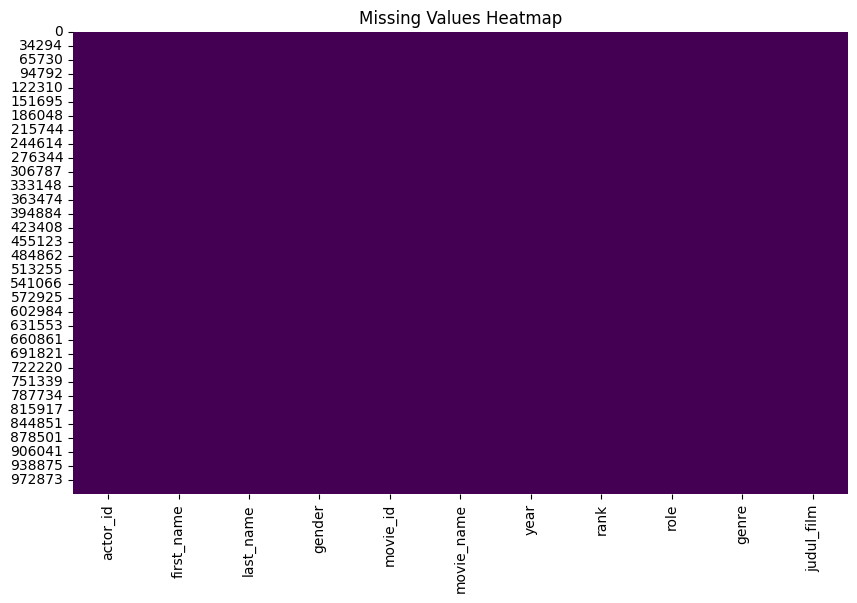

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))  # Modify the figsize as needed
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
persen = df.isnull()/ df.shape[0] * 100
print(persen)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# data type adjustment
df['actor_id'] = df['actor_id'].astype(str)
df['movie_id'] = df['movie_id'].astype(int).astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527318 entries, 0 to 1008006
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   actor_id    527318 non-null  object 
 1   first_name  527318 non-null  object 
 2   last_name   527318 non-null  object 
 3   gender      527318 non-null  object 
 4   movie_id    527318 non-null  object 
 5   movie_name  527318 non-null  object 
 6   year        527318 non-null  int64  
 7   rank        527318 non-null  float64
 8   role        527318 non-null  object 
 9   genre       527318 non-null  object 
 10  judul_film  527318 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 48.3+ MB


In [ ]:
df.head()

,actor_id,first_name,last_name,gender,movie_id,movie_name,year,rank,role,genre,judul_film
0,223733,Gregory,Itzin,M,15,$30,1999,7.5,Dad,Comedy,$30
1,289908,Erik,MacArthur,M,15,$30,1999,7.5,Scott,Comedy,$30
2,632759,Sara (I),Gilbert,F,15,$30,1999,7.5,Emily/Michelle,Comedy,$30
3,223733,Gregory,Itzin,M,15,$30,1999,7.5,Dad,Short,$30
4,289908,Erik,MacArthur,M,15,$30,1999,7.5,Scott,Short,$30


In [ ]:
df.drop_duplicates(subset=['actor_id', 'movie_id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294094 entries, 0 to 1008006
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   actor_id    294094 non-null  object 
 1   first_name  294094 non-null  object 
 2   last_name   294094 non-null  object 
 3   gender      294094 non-null  object 
 4   movie_id    294094 non-null  object 
 5   movie_name  294094 non-null  object 
 6   year        294094 non-null  int64  
 7   rank        294094 non-null  float64
 8   role        294094 non-null  object 
 9   genre       294094 non-null  object 
 10  judul_film  294094 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
sorted(df['year'].unique())

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]

In [ ]:
# check movie_genre values, the values supposed to be 'Horror' only
df['genre'].unique()

array(['Comedy', 'Drama', 'Short', 'Action', 'Thriller', 'Horror',
       'Adventure', 'Adult', 'Sci-Fi', 'Documentary', 'Crime',
       'Animation', 'Mystery', 'Romance', 'Family', 'Musical', 'Fantasy',
       'War', 'Music', 'Western'], dtype=object)

<Axes: >

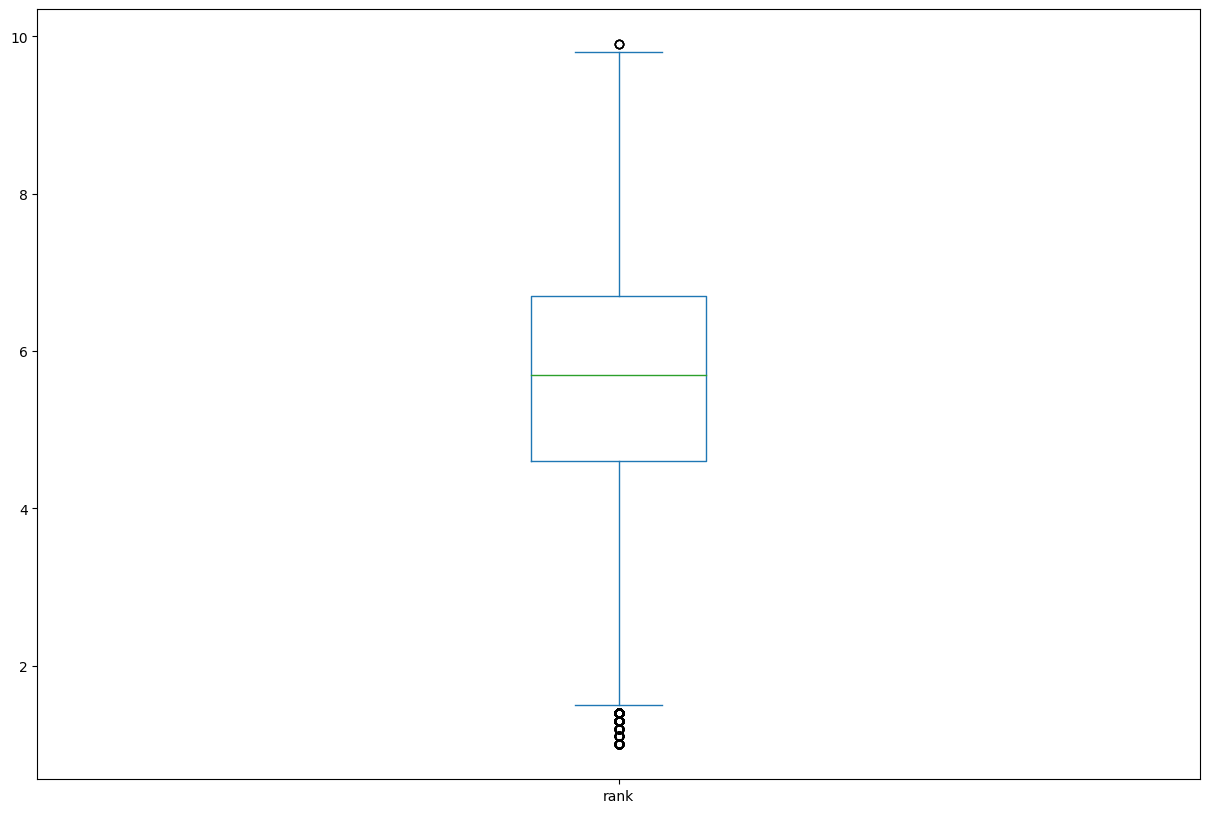

In [ ]:
# check outlier in movie_rating
df['rank'].plot.box(figsize=(15,10))

In [ ]:
df['rank'].describe()


count    294094.000000
mean          5.571566
std           1.494170
min           1.000000
25%           4.600000
50%           5.700000
75%           6.700000
max           9.900000
Name: rank, dtype: float64

In [ ]:
df['director_name'] = df['first_name'] + ' ' + df['last_name']

print(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294094 entries, 0 to 1008006
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   actor_id       294094 non-null  object 
 1   first_name     294094 non-null  object 
 2   last_name      294094 non-null  object 
 3   gender         294094 non-null  object 
 4   movie_id       294094 non-null  object 
 5   movie_name     294094 non-null  object 
 6   year           294094 non-null  int64  
 7   rank           294094 non-null  float64
 8   role           294094 non-null  object 
 9   genre          294094 non-null  object 
 10  judul_film     294094 non-null  object 
 11  director_name  294094 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 29.2+ MB


In [ ]:
print('unique actor_id:', len(df['actor_id'].unique()))
print('unique director_name:', len(df['director_name'].unique()))

unique actor_id: 164492
unique director_name: 164491


In [ ]:
print('unique movie_id:', len(df['movie_id'].unique()))
print('unique movie_name:', len(df['movie_name'].unique()))

unique movie_id: 12866
unique movie_name: 12739


In [ ]:
df[df.duplicated(keep=False)]

,actor_id,first_name,last_name,gender,movie_id,movie_name,year,rank,role,genre,judul_film,director_name


In [ ]:
df.describe()


,year,rank
count,294094.000000,294094.000000
mean,1995.068465,5.571566
std,2.867473,1.494170
min,1990.000000,1.000000
25%,1993.000000,4.600000
50%,1995.000000,5.700000
75%,1998.000000,6.700000
max,1999.000000,9.900000


In [ ]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

actor_id      0
first_name    0
last_name     0
gender        0
movie_id      0
movie_name    0
year          0
rank          0
role          0
genre         0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [ ]:
df.head()

,actor_id,first_name,last_name,gender,movie_id,movie_name,year,rank,role,genre,judul_film,director_name
0,223733,Gregory,Itzin,M,15,$30,1999,7.5,Dad,Comedy,$30,Gregory Itzin
1,289908,Erik,MacArthur,M,15,$30,1999,7.5,Scott,Comedy,$30,Erik MacArthur
2,632759,Sara (I),Gilbert,F,15,$30,1999,7.5,Emily/Michelle,Comedy,$30,Sara (I) Gilbert
6,3373,Michael,Agbabian,M,18,"$40,000",1996,9.6,News Producer,Comedy,"$40,000",Michael Agbabian
7,23089,Ron,Bagel,M,18,"$40,000",1996,9.6,Surgeon General,Comedy,"$40,000",Ron Bagel


In [ ]:
anal = df.drop(columns=['actor_id', 'first_name', 'last_name','movie_id'])
anal.head()

,gender,movie_name,year,rank,role,genre,judul_film,director_name
0,M,$30,1999,7.5,Dad,Comedy,$30,Gregory Itzin
1,M,$30,1999,7.5,Scott,Comedy,$30,Erik MacArthur
2,F,$30,1999,7.5,Emily/Michelle,Comedy,$30,Sara (I) Gilbert
6,M,"$40,000",1996,9.6,News Producer,Comedy,"$40,000",Michael Agbabian
7,M,"$40,000",1996,9.6,Surgeon General,Comedy,"$40,000",Ron Bagel


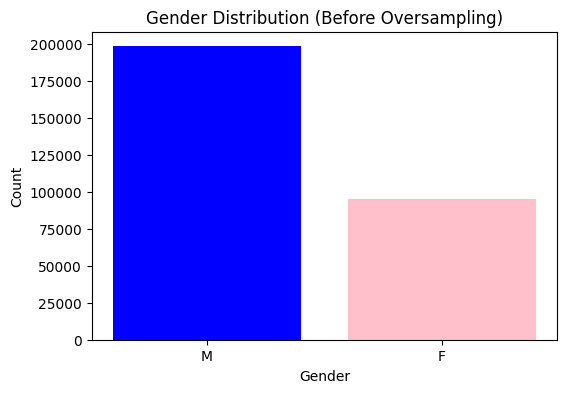

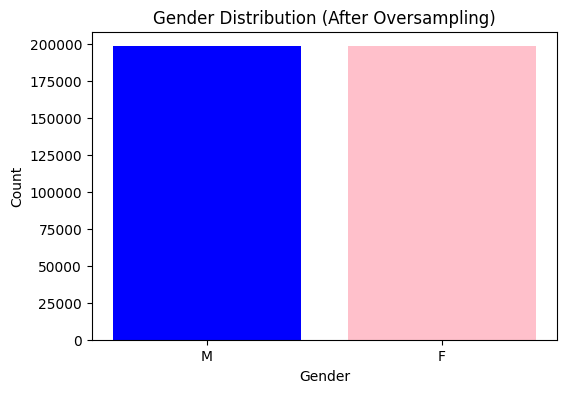

In [ ]:
from imblearn.over_sampling import RandomOverSampler
gender_counts = anal['gender'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution (Before Oversampling)')
plt.show()


ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(anal.drop('gender', axis=1), anal['gender'])


resampled_df = pd.DataFrame(X_resampled, columns=anal.drop('gender', axis=1).columns)
resampled_df['gender'] = y_resampled


resampled_gender_counts = resampled_df['gender'].value_counts()


plt.figure(figsize=(6, 4))
plt.bar(resampled_gender_counts.index, resampled_gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution (After Oversampling)')
plt.show()

In [ ]:
anal.shape

(294094, 8)

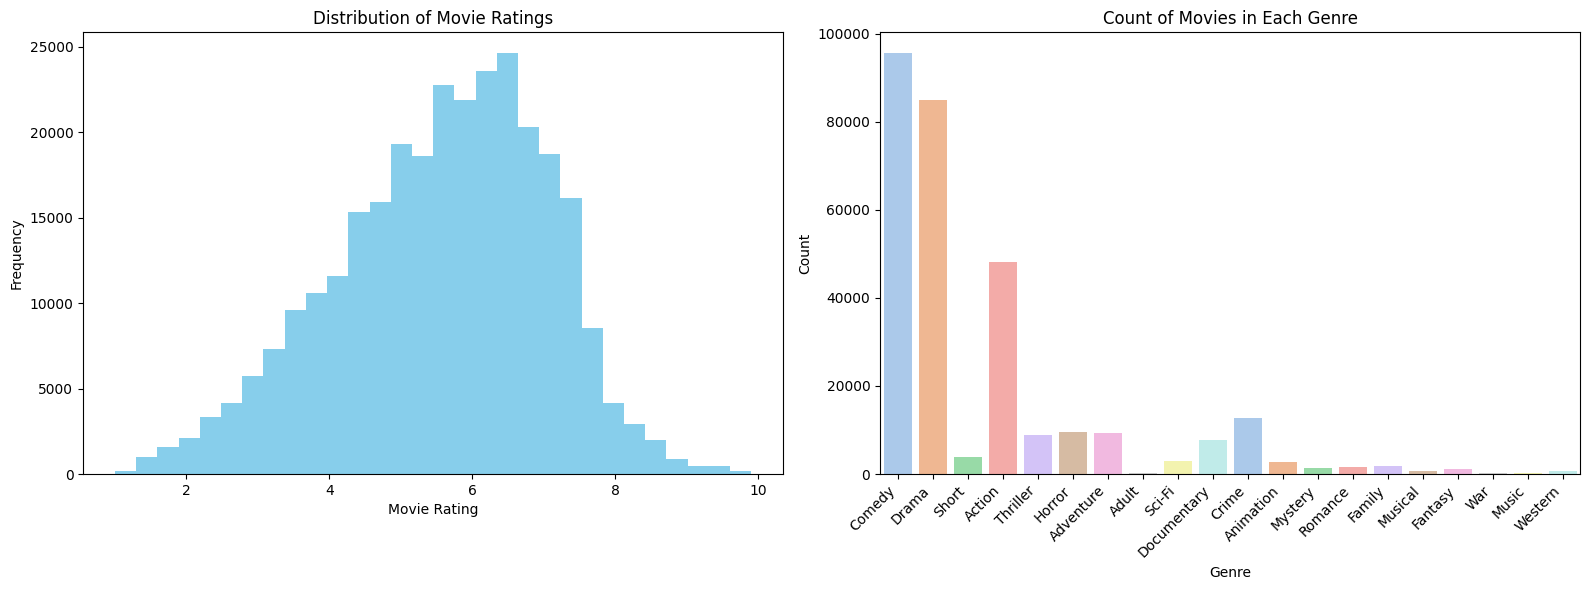

In [ ]:
import seaborn as sns



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


ax1.hist(anal['rank'], bins=30, color='skyblue')
ax1.set_xlabel('Movie Rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Movie Ratings')

sns.countplot(x='genre', data=anal, palette='pastel', ax=ax2)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Count')
ax2.set_title('Count of Movies in Each Genre')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()

plt.show()

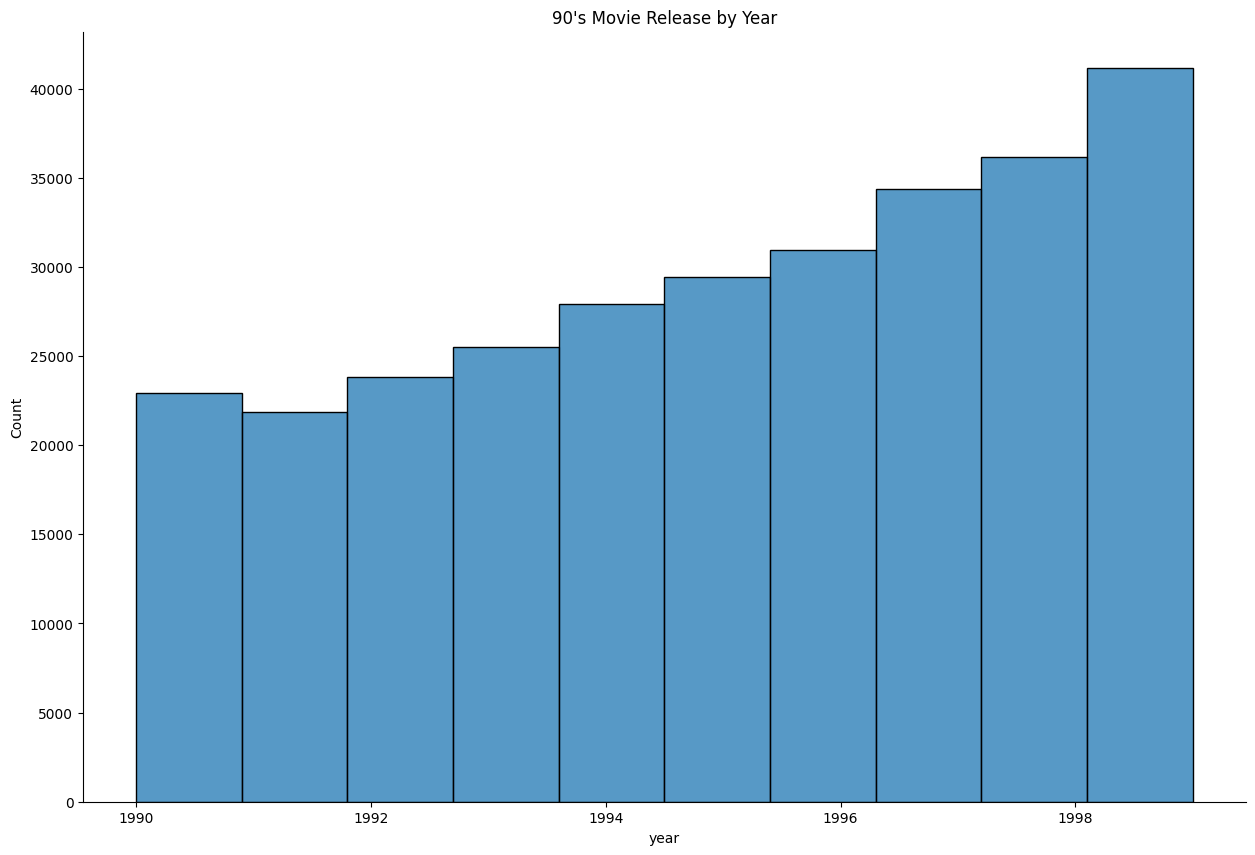

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Movie Release by Year')
sns.histplot(anal['year'], bins=10)
sns.despine()
plt.show()

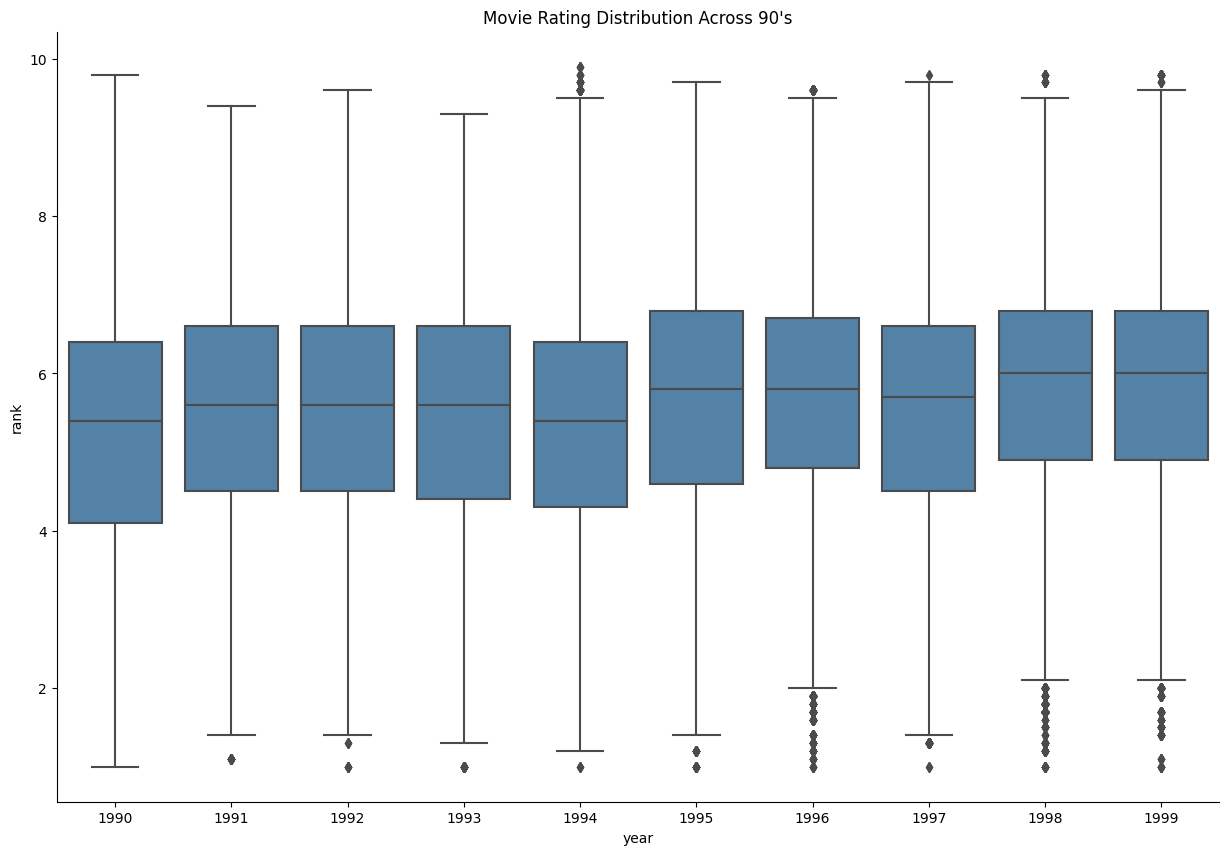

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Movie Rating Distribution Across 90\'s')
sns.boxplot(data=anal, x='year', y='rank',
            color='steelblue')
sns.despine()
plt.show()

In [ ]:
anal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294094 entries, 0 to 1008006
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gender         294094 non-null  object 
 1   movie_name     294094 non-null  object 
 2   year           294094 non-null  int64  
 3   rank           294094 non-null  float64
 4   role           294094 non-null  object 
 5   genre          294094 non-null  object 
 6   judul_film     294094 non-null  object 
 7   director_name  294094 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [ ]:
anal.head()

,gender,movie_name,year,rank,role,genre,judul_film,director_name
0,M,$30,1999,7.5,Dad,Comedy,$30,Gregory Itzin
1,M,$30,1999,7.5,Scott,Comedy,$30,Erik MacArthur
2,F,$30,1999,7.5,Emily/Michelle,Comedy,$30,Sara (I) Gilbert
6,M,"$40,000",1996,9.6,News Producer,Comedy,"$40,000",Michael Agbabian
7,M,"$40,000",1996,9.6,Surgeon General,Comedy,"$40,000",Ron Bagel


In [ ]:
anal['career_duration'] = anal.groupby('director_name')['year'].transform(lambda x: x.max() - x.min())
anal['num_genres'] = anal.groupby('director_name')['genre'].transform(lambda x: x.nunique())
analyze = anal.groupby('director_name').agg(
    gender=('gender', 'first'),
    movie_count=('movie_name', 'size'),
    movie_rating_mean=('rank', 'mean'),
    career_duration=('career_duration', 'max'),
    num_genres=('num_genres', 'max')
).reset_index()

print(analyze)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
analyze.head()

,director_name,gender,movie_count,movie_rating_mean,career_duration,num_genres
0,!Nqate Xqamxebe,M,1,6.4,0,1
1,'Big Al' Solomon,M,1,2.6,0,1
2,'Big Philly' Johnson,M,1,4.8,0,1
3,'Big' Mike Burrelle,M,1,5.0,0,1
4,'Chicken' Klabunde,F,1,6.2,0,1


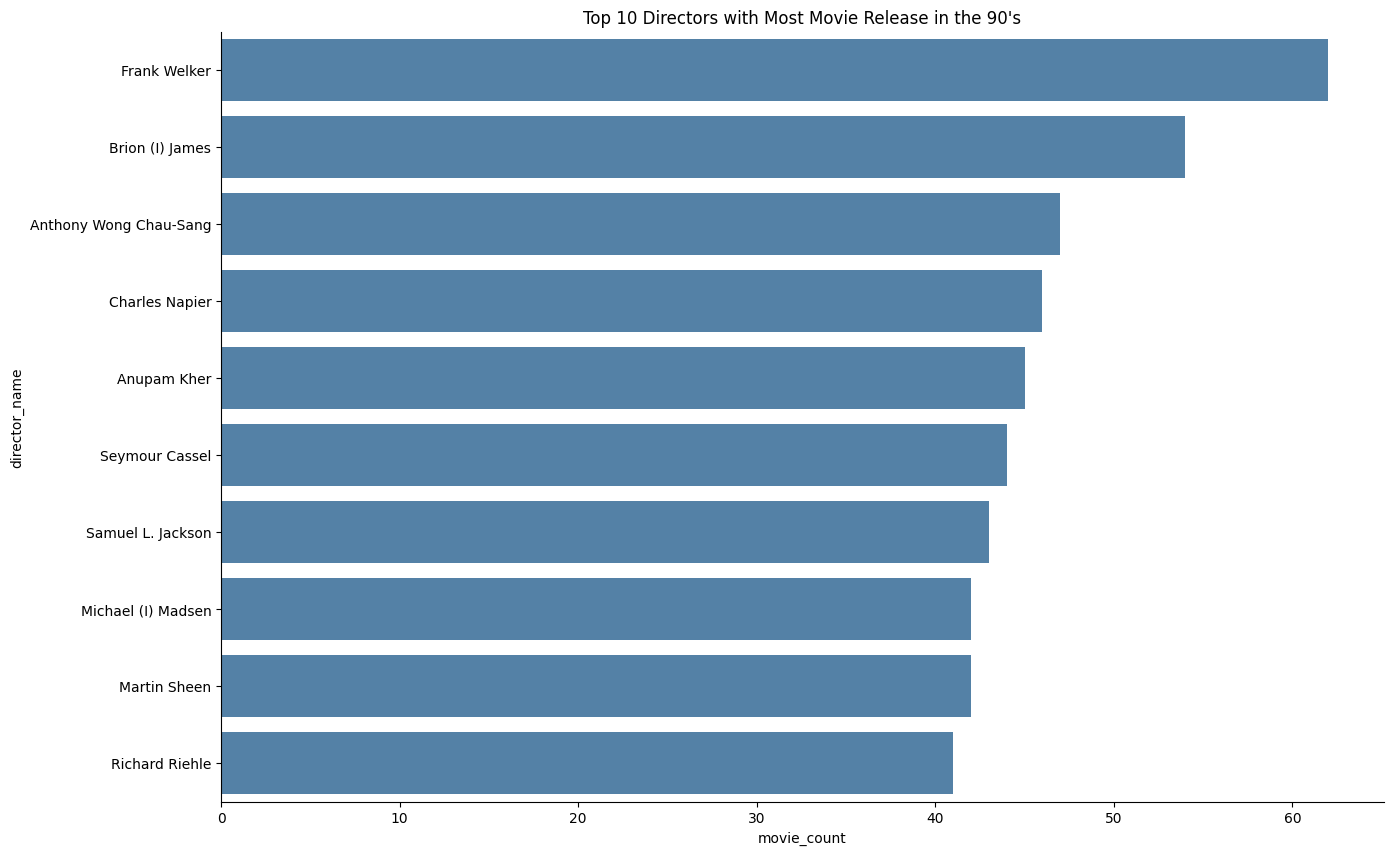

In [ ]:
high_movie_count = analyze.sort_values(by='movie_count', ascending=False).head(10)

plt.figure(figsize=(15,10))
plt.title('Top 10 Directors with Most Movie Release in the 90\'s')
sns.barplot(data=high_movie_count, x='movie_count', y='director_name',
            color='steelblue', )
sns.despine()
plt.show()

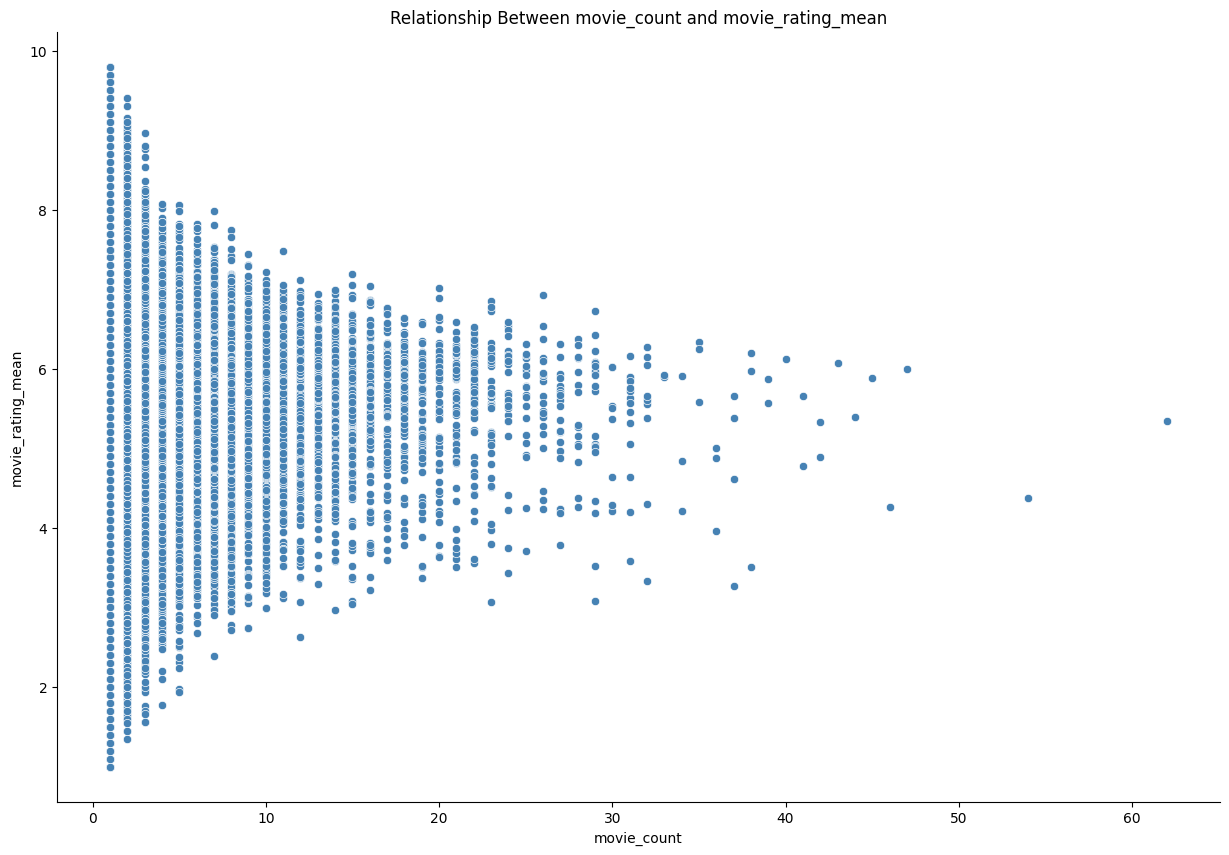

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship Between movie_count and movie_rating_mean')
sns.scatterplot(data=analyze, x='movie_count', y='movie_rating_mean',
            color='steelblue')
sns.despine()
plt.show()

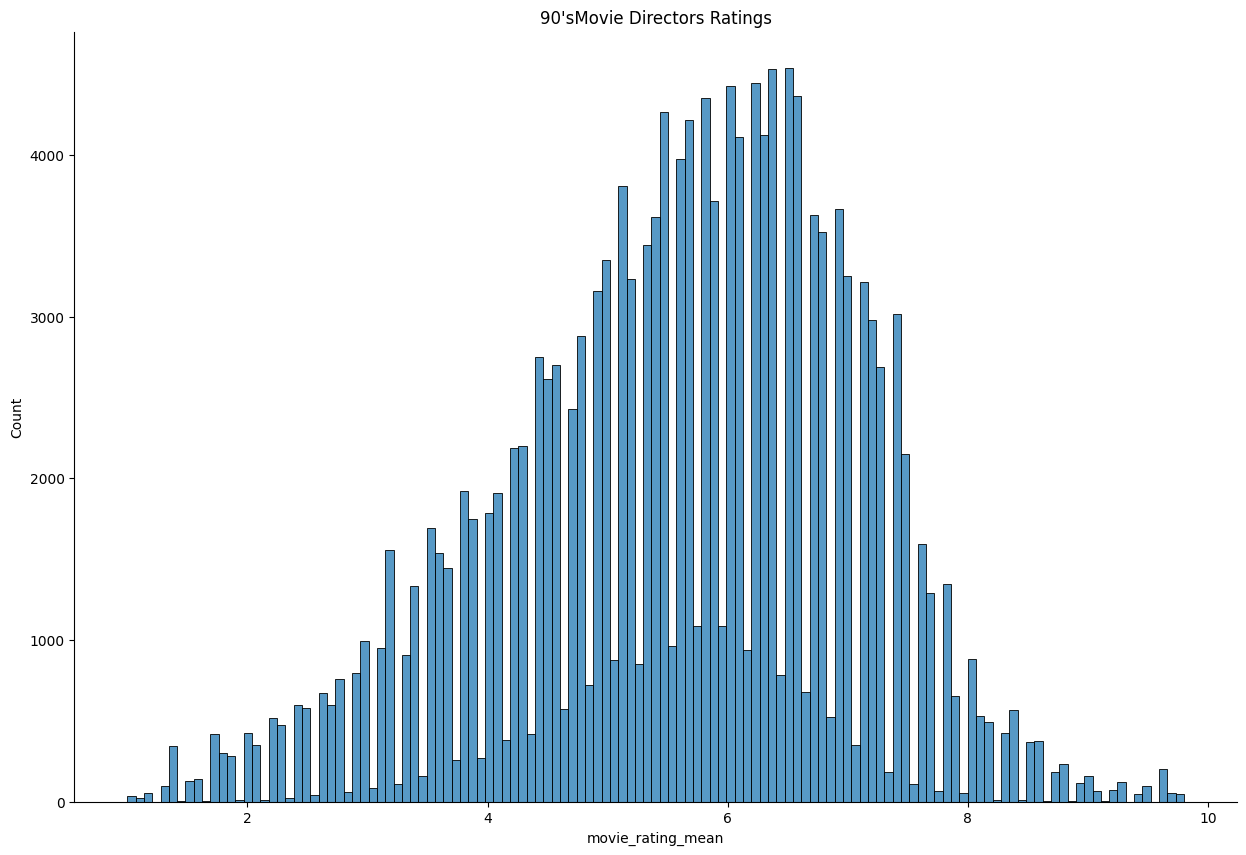

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'sMovie Directors Ratings')
sns.histplot(analyze['movie_rating_mean'])
sns.despine()
plt.show()

In [ ]:
# Assuming the DataFrame is called 'analyze'
sorted_analyze = analyze.sort_values(by=['movie_count','movie_rating_mean'], ascending=False)
sorted_analyze.head()

,director_name,gender,movie_count,movie_rating_mean,career_duration,num_genres
49663,Frank Welker,M,62,5.340323,9,7
19305,Brion (I) James,M,54,4.379630,9,10
10293,Anthony Wong Chau-Sang,M,47,5.995745,9,5
24144,Charles Napier,M,46,4.263043,9,9
10869,Anupam Kher,M,45,5.880000,9,6


In [ ]:
# Assuming the DataFrame is called 'analyze'
sorted_analyze = analyze.sort_values(by=['career_duration','movie_count','movie_rating_mean',], ascending=False)
sorted_analyze.head()

,director_name,gender,movie_count,movie_rating_mean,career_duration,num_genres
49663,Frank Welker,M,62,5.340323,9,7
19305,Brion (I) James,M,54,4.379630,9,10
10293,Anthony Wong Chau-Sang,M,47,5.995745,9,5
24144,Charles Napier,M,46,4.263043,9,9
10869,Anupam Kher,M,45,5.880000,9,6


In [ ]:
# Assuming the DataFrame is called 'analyze'
sorted_analyze = analyze.sort_values(by=['num_genres','movie_rating_mean',], ascending=False)
sorted_analyze.head()

,director_name,gender,movie_count,movie_rating_mean,career_duration,num_genres
140980,Seymour Cassel,M,44,5.390909,9,11
121128,Paul (II) Guilfoyle,M,30,6.020000,9,10
111710,Miranda (I) Richardson,F,22,5.940909,9,10
76159,John Hurt,M,27,5.929630,9,10
65626,James Earl Jones,M,33,5.903030,9,10


In [ ]:
nominee = analyze.sort_values(by=['career_duration','movie_count','movie_rating_mean'], ascending=False).iloc[:3,0]
winner = nominee.iloc[0]

print('nominasi spesial berupa penghargaan dengan kategori Aktor Legenda Abad Ini:')
for i in nominee:
  print('-',i)

print()
print('penghargaan dengan kategori Aktor Legenda Abad Ini:\n-',winner)

nominasi spesial berupa penghargaan dengan kategori Aktor Legenda Abad Ini:
- Frank Welker
- Brion (I) James
- Anthony Wong Chau-Sang

penghargaan dengan kategori Aktor Legenda Abad Ini:
- Frank Welker


In [ ]:
nominee3 = analyze.sort_values(by=['num_genres','movie_rating_mean',], ascending=False).iloc[:5,0]
print('daftar berisi 5 rekomendasi aktris:')
for i in nominee3:
  print('-',i)

print()


daftar berisi 5 rekomendasi aktris:
- Seymour Cassel
- Paul (II) Guilfoyle
- Miranda (I) Richardson
- John Hurt
- James Earl Jones



In [ ]:
nominee1 = analyze[analyze['gender'] == 'M'].sort_values(by=['movie_count','movie_rating_mean'], ascending=False).iloc[:5, 0]

# Get the first entry from the 'nominee1' DataFrame, which will be the winner.
winner1 = nominee1.iloc[0]

print('Nominasi Aktor Terbaik Tahun 90an:')
for i in nominee1:
    print('-', i)

print()
print('perhagaan Aktor Terbaik Tahun 90an-', winner1)

Nominasi Aktor Terbaik Tahun 90an:
- Frank Welker
- Brion (I) James
- Anthony Wong Chau-Sang
- Charles Napier
- Anupam Kher

perhagaan Aktor Terbaik Tahun 90an- Frank Welker


In [ ]:
nomineef = analyze[analyze['gender'] == 'F'].sort_values(by=['movie_count','movie_rating_mean'], ascending=False).iloc[:5, 0]

# Get the first entry from the 'nominee1' DataFrame, which will be the winner.
winnerf = nomineef.iloc[0]

print('Nominasi Aktris Terbaik Tahun 90an:')
for i in nomineef:
    print('-', i)

print()
print('Penghargaan Aktris Terbaik Tahun 90an:\n-', winnerf)

Nominasi Aktris Terbaik Tahun 90an:
- Julie Strain
- Whoopi Goldberg
- King-Tan Yuen
- Karen (I) Black
- Chingmy Yau

Penghargaan Aktris Terbaik Tahun 90an:
- Julie Strain
